(5,0,0) 3.15281586803e-22
(0,5,0) 3.61989956835e-22
(0,0,0) 1.13921745964e-19
88.0034
('SIMPLE', True, 'Written by IDL:  Sun Mar 22 12:11:37 2009')
('BITPIX', -32, '16-bit twos complement binary integer')
('NAXIS', 3, 'Number of axes')
('NAXIS1', 300, '/ Number pixels on axis 1')
('NAXIS2', 300, '/ Number pixels on axis 2')
('NAXIS3', 40, '/ Number pixels on axis 3')
('CTYPE1', 'x IN PC', 'axis 1 coord type')
('CRVAL1', -14.95, '/ coord value at CRPIX1')
('CDELT1', 0.1, '/ pixel spacing for axis 1')
('CRPIX1', 1, '/ ref pixel for axis 1')
('CTYPE2', 'y IN PC', 'axis 2 coord type')
('CRVAL2', -14.95, '/ coord value at CRPIX2')
('CDELT2', 0.1, '/ pixel spacing for axis 2')
('CRPIX2', 1, '/ ref pixel for axis 2')
('CTYPE3', 'z IN PC', 'axis 3 coord type')
('CRVAL3', -0.4875, '/ coord value at CRPIX3')
('CDELT3', 0.025, '/ pixel spacing for axis 3')
('CRPIX3', 1, '/ ref pixel for axis 3')
('HISTORY', 'Corrected for undersampling by Ke Fang, 03/18/09', '')
('COMMENT', 'deconvolution of CFA 

/home/carlson/ipython/IPython/kernel/__main__.py:57: RuntimeWarning: divide by zero encountered in log10
/home/carlson/anaconda/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:2264: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)



(40, 300, 300)
0.0 -2.70093
0.128915 -2.70093
0.0300273


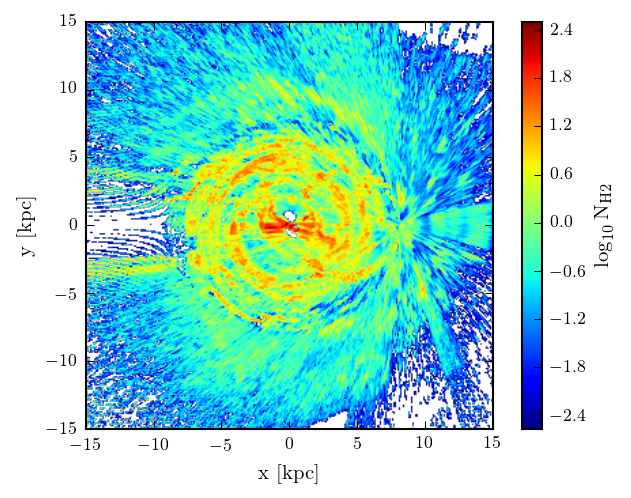

In [9]:
import pyfits

# Write CO maps
orig = pyfits.open('./mod-total-rev2int.fit.gz')

hdu = pyfits.PrimaryHDU(orig[0].data/2.3e20)
hdu.header = orig[0].header
hdu.header.remove('DATAMIN')
hdu.header.remove('DATAMAX')

hdu.header['CRVAL1'] /= 1e3
hdu.header['CRVAL2'] /= 1e3
hdu.header['CRVAL3'] /= 1e3
hdu.header['CDELT1'] /= 1e3
hdu.header['CDELT2'] /= 1e3
hdu.header['CDELT3'] /= 1e3


print '(5,0,0)', orig[0].data[19,149,199]/2.3e20
print '(0,5,0)', orig[0].data[19,199,149]/2.3e20
print '(0,0,0)', orig[0].data[19,149,149]/2.3e20
print np.max(orig[0].data)

hdu.header.add_comment('Map altered for use in galprop by Eric Carlson 10/26/2014.')
hdu.header.add_comment('Units now in CO molecules/cm^3.  Earth is at (8,0,0) kpc with -y for positive longitudes. ') 

print hdu.header.cards
hdulist = pyfits.HDUList([hdu,])
hdulist.writeto('CO_PEB_galprop.fits',clobber=True)



hdu = pyfits.PrimaryHDU(orig[0].data/2.3e20/(8.5/8)**3)
hdu.header = orig[0].header
#hdu.header.remove('DATAMIN')
#hdu.header.remove('DATAMAX')

hdu.header['CRVAL1'] = hdu.header['CRVAL1']/1e3*8.5/8.
hdu.header['CRVAL2'] = hdu.header['CRVAL2']/1e3*8.5/8.
hdu.header['CRVAL3'] = hdu.header['CRVAL3']/1e3*8.5/8.
hdu.header['CDELT1'] = hdu.header['CDELT1']/1e3*8.5/8.
hdu.header['CDELT2'] = hdu.header['CDELT2']/1e3*8.5/8.
hdu.header['CDELT3'] = hdu.header['CDELT3']/1e3*8.5/8.


hdu.header.add_comment('Map altered for use in galprop by Eric Carlson 10/26/2014.')
hdu.header.add_comment('Units now in CO molecules/cm^3.  Earth is at (8.5,0,0) kpc with -y for positive longitudes. ') 

print hdu.header.cards
hdulist = pyfits.HDUList([hdu,])
hdulist.writeto('CO_PEB_galprop_8500.fits',clobber=True)




print orig[0].data.shape
im = plt.imshow(np.log10(np.sum((orig[0].data),axis=0)),origin='lower',extent=[-15,15,-15,15])
plt.ylabel('y [kpc]')
plt.xlabel('x [kpc]')
summed = np.sum((orig[0].data),axis=0)
plt.colorbar(im, label=r'$\log_{10} \rm{N_{H2}}$')
plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/H2_col_dens_z.png')
plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/H2_col_dens_z.pdf')
print (summed[150,0]),(np.log(summed[150,299]))
print (summed[0,193]),(np.log(summed[150,299]))

print np.mean(orig[0].data)

In [1]:


def nHI(r,z):
    """
    Analytic Gas model for HI from galprop
    @param r: radius in kpc
    @param z: z in kpc
    """
    r_list = [ 0.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0,  
              6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5,10.0,10.5,11.0,
              11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0]

    nH_list = [ .10, .13, .14, .16, .19, .25, .30, .33, .32, .31, 
                .30, .37, .38, .36, .32, .29, .38, .40, .25, .23,  
                .32, .36, .32, .25, .16, .10, .09, .08, .06, .00] # nHI




    nGB, nDL = 0.33, 0.57;   # cm^-3, disk density @ 4-8 kpc; [GB76], [DL90]
    A1, z1 = 0.395, 0.212/2. # cm^-3, kpc; Z-distribution parameters from [DL90]
    A2, z2 = 0.107, 0.530/2.
    B, zh  = 0.064, 0.403

    fR = np.interp(r, r_list, nH_list)

    if r < 10.:
        fZ1 =A1*exp(-log(2.)*pow(z/z1,2))+A2*exp(-log(2.)*pow(z/z2,2))+B*exp(-fabs(z)/zh) # [DL90]

    if r > 8.:
        fZ2=nDL*exp(-pow(z/(0.0523*exp(0.11*r)), 2)); # [C86] IMOS20010220

    if r <= 8.:
        fZ = fZ1
    elif r>=10:
        fZ=fZ2
    else:
        fZ = fZ1 +(fZ2 -fZ1)/2.*(r -8.)  # interp. [DL90] & [C86]
        
    return fZ *fR/nGB



(-17.677669529663689, 17.677669529663685, 162, 338)
MAX: 0.00333977


/home/carlson/ipython/IPython/kernel/__main__.py:47: RuntimeWarning: divide by zero encountered in divide
/home/carlson/ipython/IPython/kernel/__main__.py:47: RuntimeWarning: invalid value encountered in divide
/home/carlson/ipython/IPython/kernel/__main__.py:47: RuntimeWarning: invalid value encountered in less


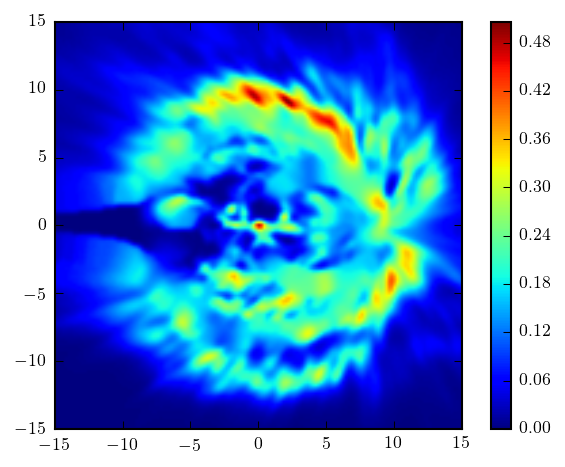

(-17.677669529663689, 17.677669529663685, 162, 338)
MAX: 0.0033506


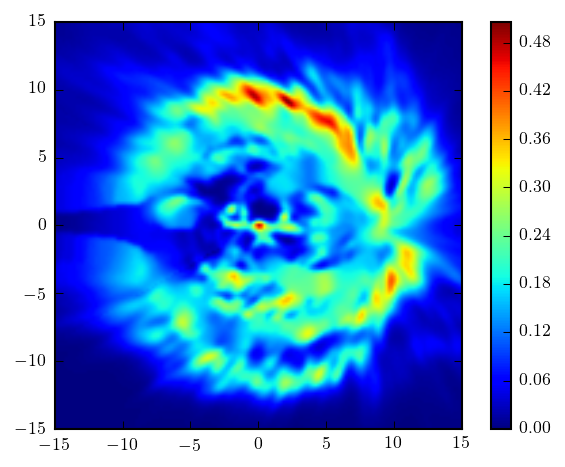

(-17.677669529663689, 17.677669529663685, 162, 338)
MAX: 0.00336142


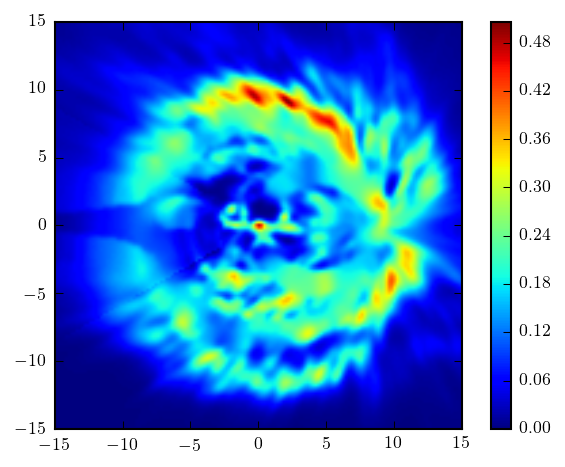

(-17.677669529663689, 17.677669529663685, 162, 338)
MAX: 0.00337225


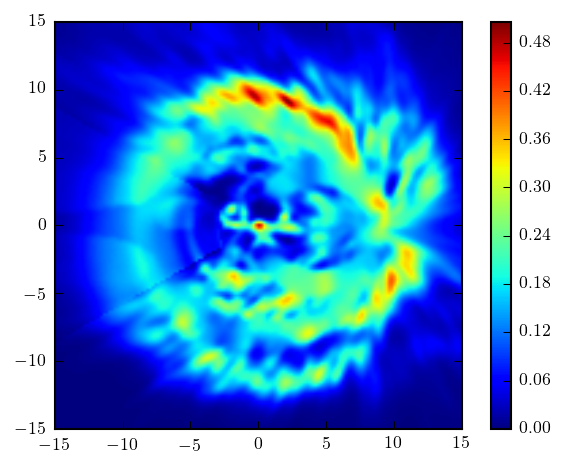

(-17.677669529663689, 17.677669529663685, 162, 338)
MAX: 0.00338308


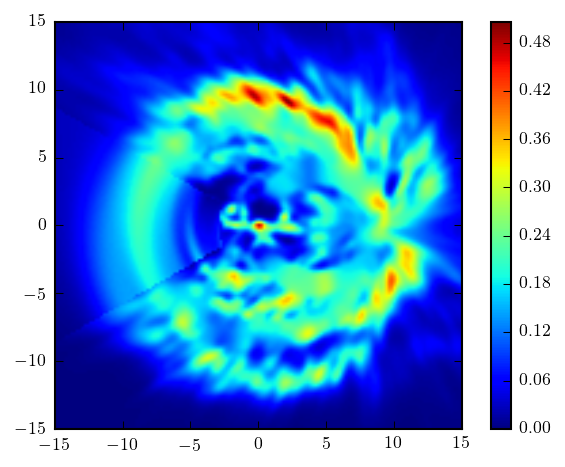

In [3]:
import pyfits

for frac in [0.00,0.25,0.50,0.75,1.00]:
    # Write CO maps
    orig = pyfits.open('./HI_NS.fits.gz')
    def reversedim(M,k=0):
        idx = tuple((slice(None,None,-1) if ii == k else slice(None) 
                for ii in xrange(M.ndim)))
        return M[idx]
    reversed_arr = reversedim(orig[0].data,1)
    

    # Need to mask theta +-30 deg. 
    x, y, z = np.linspace(-50,50,501), np.linspace(-50,50,501), np.linspace(-2,2,51)


    def GetPos(r,theta):
        x, y = -r*np.cos(np.deg2rad(theta)), r*np.sin(np.deg2rad(theta))
        ix, iy = np.round((x+50)/.2).astype(np.int32), np.round((y+50)/.2).astype(np.int32)
        return x, y, ix, iy

    print GetPos(25,45)

    def InterpolateSides(r, theta, avg_angle=10):
        # first read out edges
        theta1 = np.linspace(-30-avg_angle, -30, int(avg_angle)*2)
        theta2 = np.linspace(30, 30+avg_angle, int(avg_angle)*2)

        # Gets the x,y array coords of the regions we are averaging over.
        x1,y1,ix1,iy1 = GetPos(r,theta1)
        #print x1, 
        x2,y2,ix2,iy2 = GetPos(r,theta2)
        # Average the values.  Now have a list as a function of z for the leading and trailing edges.
        edge1 = np.average(reversed_arr[:,iy1,ix1], axis=1)
        edge2 = np.average(reversed_arr[:,iy2,ix2], axis=1)
        #print np.average(edge2/edge1)
        return (30+theta)/60.*edge2 + (1-(theta+30)/60.)*edge1

    # This fraction controls how much interpolation vs the gas map is used in the masked region. 

    for ix, x_pos in enumerate(x):
        print ix/float(len(x)),'\r', 

        if x_pos > 0. or np.abs(x_pos) > 25.: 
            continue

        idx = np.where(np.abs(np.arctan(y/x_pos))<np.deg2rad(30.))[0]
        r = np.sqrt(y*y + x_pos*x_pos)

        for y_idx in idx:
            r_pos = r[y_idx]
            if r_pos < 3.: continue
            #print x_pos,y[y_idx]
            #print r_pos
            theta = -np.rad2deg(np.arctan(y[y_idx]/x_pos))

            reversed_arr[:, y_idx, ix] = (1-frac)*reversed_arr[:, y_idx, ix] + frac*InterpolateSides(r_pos,theta,avg_angle=15)

            #for iz, z_pos in enumerate(z):
            #    reversed_arr[iz, y_idx, ix] = nHI(r_pos,z_pos)



    hdu = pyfits.PrimaryHDU(reversed_arr.astype(np.float32))
    hdu.header = orig[0].header
    print "MAX:", np.mean(reversed_arr)

    hdu.header.add_comment('Map altered for use in galprop by Eric Carlson 10/26/2014.')
    hdu.header.add_comment('Units now in HI molecules/cm^3.  Earth is at (8,0,0) kpc with -y for positive longitudes.') 
    hdu.header.add_comment('(Coords reversed from NS paper to match galprop)')

    #print hdu.header.cards

    hdulist = pyfits.HDUList([hdu,])
    #hdulist.writeto('HI_NS_galprop.fits',clobber=True)
    hdulist.writeto('HI_NS_galprop_r8000_interp'+str(int(100*frac))+'.fits',clobber=True)
    #hdulist.writeto('HI_NS_galprop_no_mask.fits',clobber=True)

    im = plt.imshow(reversed_arr[25],origin='lower',extent=[-50,50,-50,50])



    summed = np.sum((reversed_arr[0]),axis=0)
    plt.xlim(-15,15)
    plt.ylim(-15,15)
    plt.colorbar(im)
    plt.show()


    #############################################
    # 8.5 kpc version

    # Write CO maps
    orig = pyfits.open('./HI_NS.fits.gz')


    hdu = pyfits.PrimaryHDU((reversed_arr.astype(np.float32)*(8.5/8)**3))
    hdu.header = orig[0].header

    hdu.header['CRVAL1'] = hdu.header['CRVAL1']*(8.5/8)
    hdu.header['CRVAL2'] = hdu.header['CRVAL2']*(8.5/8)
    hdu.header['CRVAL3'] = hdu.header['CRVAL3']*(8.5/8)
    hdu.header['CDELT1'] = hdu.header['CDELT1']*(8.5/8)
    hdu.header['CDELT2'] = hdu.header['CDELT2']*(8.5/8)
    hdu.header['CDELT3'] = hdu.header['CDELT3']*(8.5/8)

    hdu.header.add_comment('Map altered for use in galprop by Eric Carlson 10/26/2014.')
    hdu.header.add_comment('Units now in HI molecules/cm^3.  Earth is at (8.0,0,0) kpc with -y for positive longitudes.') 
    hdu.header.add_comment('(Coords transformed from NS paper to match galprop)')

    hdulist = pyfits.HDUList([hdu,])
    #hdulist.writeto('HI_NS_galprop_8500.fits',clobber=True)
    hdulist.writeto('HI_NS_galprop_r8500_interp'+str(int(100*frac))+'.fits',clobber=True)





In [75]:
reversed_arr[51,337,339]

IndexError: index 51 is out of bounds for axis 0 with size 51

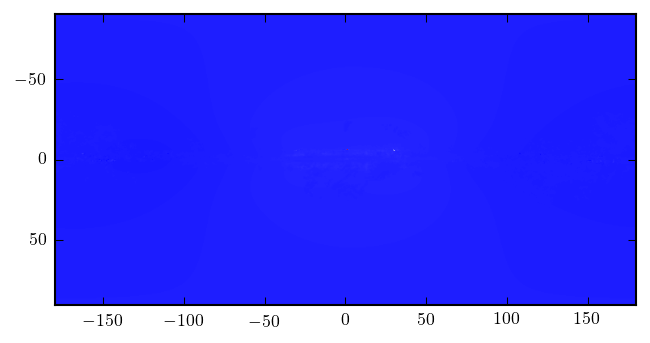

In [2]:
hdulist = pyfits.open('/data/galprop2/FITS/pion_decay_HIR_mapcube_comp_3_54_debug.gz')
hdulist2 = pyfits.open('/data/galprop2/FITS/pion_decay_HIR_mapcube_comp_4_54_debug_old.gz')

hdulist = pyfits.open('/data/galprop2/FITS/pion_decay_mapcube_54_debug.gz')
hdulist2 = pyfits.open('/data/galprop2/FITS/pion_decay_mapcube_54_debug_old.gz')


data_new = hdulist[0].data[0]/np.average(hdulist[0].data[0])
data_old = hdulist2[0].data[0]/np.average(hdulist2[0].data[0])

#plt.figure(figsize=(20,12))
im = plt.imshow((np.roll(data_new/data_old-1,data_new.shape[1]/2,axis=1)),extent=[-180,180,-90,90],origin='lower',cmap='bwr')
#im = plt.imshow((np.roll(hdulist[0].data[0],hdulist[0].data[0].shape[1]/2,axis=1)),extent=[-180,180,-90,90],origin='lower')
#plt.colorbar(im)
plt.xlim(-180,180)
plt.ylim(90,-90)
plt.show()

#im = plt.imshow((np.roll(hdulist2[0].data[0],hdulist[0].data[0].shape[1]/2,axis=1)),extent=[-180,180,-90,90],origin='lower')
#plt.colorbar(im)
#plt.ylim(-15,15)
#plt.xlim(15,-15)

(91, 360, 720)


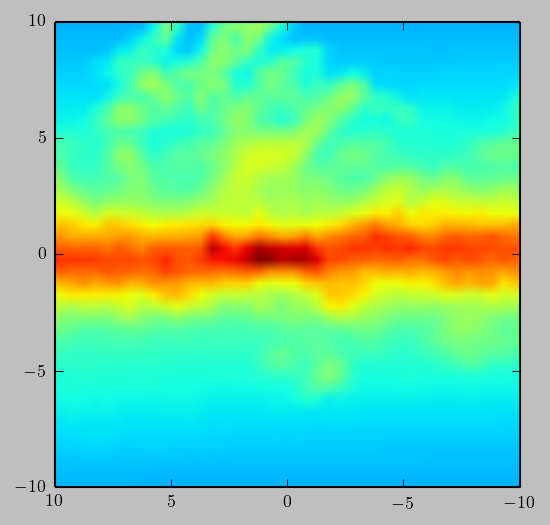

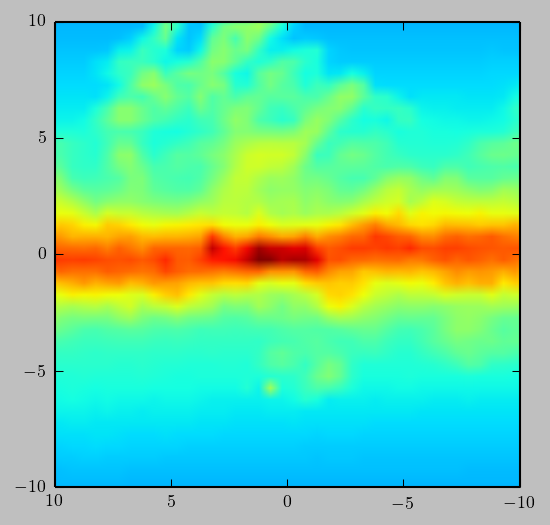

In [120]:
print hdulist[0].data.shape
hdulist = pyfits.open('/data/galprop2/FITS/pion_decay_mapcube_54_debug_old.gz')
plt.imshow(np.log(np.roll(hdulist[0].data[0],hdulist[0].data[0].shape[1]/2,axis=1)),extent=[-180,180,-90,90],origin='lower')
plt.ylim(-10,10)
plt.xlim(10,-10)
plt.show()
hdulist2 = pyfits.open('//data/galprop2/FITS/pion_decay_mapcube_54_debug.gz')
plt.imshow(np.log(np.roll(hdulist2[0].data[0],hdulist[0].data[0].shape[1]/2,axis=1)),extent=[-180,180,-90,90],origin='lower')
plt.ylim(-10,10)
plt.xlim(10,-10)

plt.show()


0.52691
('SIMPLE', True, 'file does conform to FITS standard')
('BITPIX', -32, 'number of bits per data pixel')
('NAXIS', 3, 'number of data axes')
('NAXIS1', 201, 'length of data axis 1')
('NAXIS2', 201, 'length of data axis 2')
('NAXIS3', 51, 'length of data axis 3')
('EXTEND', True, 'FITS dataset may contain extensions')
('COMMENT', '  FITS (Flexible Image Transport System) format defined in Astronomy and', '')
('COMMENT', '  Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.', '')
('COMMENT', '  Contact the NASA Science Office of Standards and Technology for the', '')
('COMMENT', '  FITS Definition document #100 and other FITS information.', '')
('BUNIT', 'H2 / cm^3', '')
('CTYPE1', 'X-kpc', '')
('CRVAL1', -20.0, '')
('CRPIX1', 1, '')
('CDELT1', 0.2, '')
('CTYPE2', 'Y-kpc', '')
('CRVAL2', -20.0, '')
('CRPIX2', 1, '')
('CDELT2', 0.2, '')
('CTYPE3', 'Z-kpc', '')
('CRVAL3', -2.0, '')
('CRPIX3', 1, '')
('CDELT3', 0.02, '')
('', '', '')
('', '', '')

/home/carlson/ipython/IPython/kernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/home/carlson/ipython/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in log10


/home/carlson/anaconda/lib/python2.7/site-packages/pyfits-3.3-py2.7-linux-x86_64.egg/pyfits/file.py:339: UserWarning: Overwriting existing file 'H2_NS_kipac_galprop.fits'.
  warnings.warn("Overwriting existing file %r." % self.name)


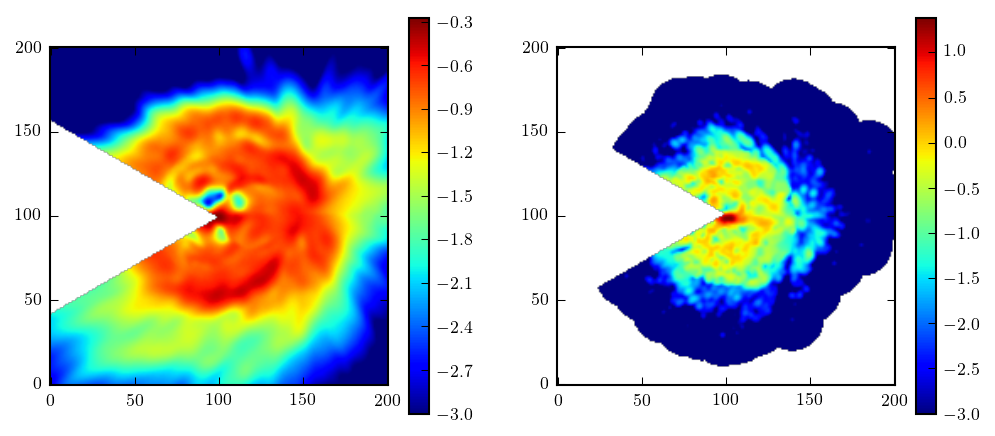

In [16]:

def reversedim(M,k=0):
    idx = tuple((slice(None,None,-1) if ii == k else slice(None) 
            for ii in xrange(M.ndim)))
    return M[idx]



plt.figure(figsize=(8, 3.4))

plt.subplot(121)
orig = pyfits.open('/data/GCE_sys/HIcube.fits')
#d = reversedim(np.transpose(orig[0].data, axes=[0,2,1]),1)
d = np.transpose(orig[0].data, axes=[0,2,1])
plt.imshow(np.log10(d[26]), vmin=-3, origin='lower')
plt.colorbar()

print np.max(d)



hdu = pyfits.PrimaryHDU((d.astype(np.float32)))
hdu.header = orig[0].header
hdu.header.add_comment('Map altered for use in galprop by Eric Carlson 12/29/2014.')
hdu.header.add_comment('Units now in HI/cm^3.  Earth is at (8.0,0,0) kpc with -y for positive longitudes.') 
hdu.header.add_comment('(Coords reversed from NS paper to match galprop)')
hdulist = pyfits.HDUList([hdu,])
hdulist.writeto('HI_NS_kipac_galprop.fits',clobber=True)


plt.subplot(122)
orig = pyfits.open('/data/GCE_sys/H2cube.fits')
d = reversedim(np.transpose(orig[0].data, axes=[0,2,1]),1)
print orig[0].header.cards
plt.imshow(np.log10(d[26]), vmin=-3, origin='lower')
plt.colorbar()

hdu.header.add_comment('Map altered for use in galprop by Eric Carlson 12/29/2014.')
hdu.header.add_comment('Units now in H2 molecules/cm^3.  Earth is at (8.0,0,0) kpc with -y for positive longitudes.') 
hdu.header.add_comment('(Coords reversed from NS paper to match galprop)')
hdulist = pyfits.HDUList([hdu,])
hdulist.writeto('H2_NS_kipac_galprop.fits',clobber=True)




('SIMPLE', True, 'Written by IDL:  Sun Mar 22 12:11:37 2009')
('BITPIX', -32, '16-bit twos complement binary integer')
('NAXIS', 3, 'Number of axes')
('NAXIS1', 300, '/ Number pixels on axis 1')
('NAXIS2', 300, '/ Number pixels on axis 2')
('NAXIS3', 40, '/ Number pixels on axis 3')
('CTYPE1', 'x IN PC', 'axis 1 coord type')
('CRVAL1', -14.95, '/ coord value at CRPIX1')
('CDELT1', 0.1, '/ pixel spacing for axis 1')
('CRPIX1', 1, '/ ref pixel for axis 1')
('CTYPE2', 'y IN PC', 'axis 2 coord type')
('CRVAL2', -14.95, '/ coord value at CRPIX2')
('CDELT2', 0.1, '/ pixel spacing for axis 2')
('CRPIX2', 1, '/ ref pixel for axis 2')
('CTYPE3', 'z IN PC', 'axis 3 coord type')
('CRVAL3', -0.4875, '/ coord value at CRPIX3')
('CDELT3', 0.025, '/ pixel spacing for axis 3')
('CRPIX3', 1, '/ ref pixel for axis 3')
('HISTORY', 'Corrected for undersampling by Ke Fang, 03/18/09', '')
('COMMENT', 'deconvolution of CFA CO data cube by MKP', '')
('COMMENT', 'value is n_h2 in molecules/cm^3 that is attribu

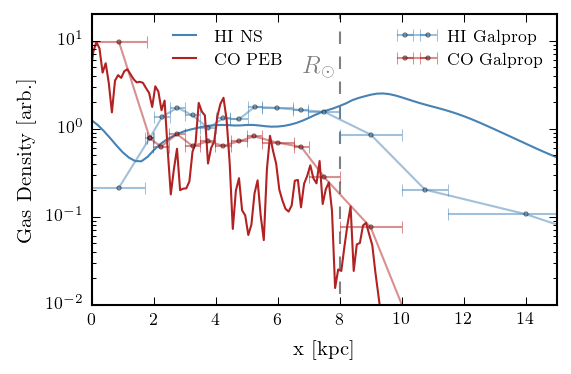

In [106]:
hi = pyfits.open('HI_NS_kipac_galprop.fits.gz')
co = pyfits.open('CO_PEB_galprop.fits.gz')
plt.figure(figsize=(4,2.5))
print co[0].header.cards
plt.plot(np.linspace(0,20,101), hi[0].data[25,100,100:]/np.average(hi[0].data[25,100,100:]), label='HI NS' )
#plt.plot(np.linspace(-20,20,201), hi[0].data[25,100], label='HI NS' )
#plt.plot(np.linspace(-14.95,14.95,300), co[0].data[20,150], label='CO PEB')

co_galprop = pyfits.open('/data/galprop2/FITS/rbands_hi12_v2_qdeg_zmax1_Ts150_EBV_mag5_limit.fits.gz')
rcent=[np.average(i) for i in co_galprop[1].data]
print co_galprop[1].data
vals = co_galprop[0].data[:,360,0]/np.array([i[1]-i[0] for i in co_galprop[1].data])
print vals
xerr=[]

for i, rband in enumerate(co_galprop[1].data):
    #print vals[i], rband[0], (vals[i]-rband[0])
    xerr.append((rcent[i]-rband[0]))
plt.errorbar(rcent, vals/np.average(vals), label='HI Galprop', xerr=xerr,marker='o', 
             color='steelblue', linestyle='-',markersize=2, alpha=.5)



plt.plot(np.linspace(-14.95,14.95,300), co[0].data[20,150]/np.average(co[0].data[20,150]), label='CO PEB')

co_galprop = pyfits.open('/data/galprop2/FITS/rbands_co10mm_v2_2001_qdeg.fits.gz')
print co_galprop[0].header.cards
rcent=[np.average(i) for i in co_galprop[1].data]
vals = co_galprop[0].data[:,360,0]/np.array([i[1]-i[0] for i in co_galprop[1].data])
xerr=[]
for i, rband in enumerate(co_galprop[1].data):
    print vals[i], rband[0], (vals[i]-rband[0])
    xerr.append((rcent[i]-rband[0]))
plt.errorbar(rcent, vals/np.average(vals), label='CO Galprop', xerr=xerr,marker='o', 
             color='firebrick', linestyle='-',markersize=2, alpha=.5)



plt.ylabel(r'Gas Density [arb.]')
plt.xlabel(r'x [kpc]')
plt.yscale('log')
plt.vlines(8.0, 1e-5,1000,linestyle='--',color='gray')
plt.ylim(1e-2, 20)
plt.xlim(0,15)
plt.text(6.8,4, '$R_{\odot}$', rotation=0, color='gray')
plt.legend(frameon=0, ncol=2, fontsize=8,columnspacing=7)


plt.savefig('/home/carlson/Dropbox/2015_Fermi_GI_Hadronic (Eric, Stefano)/gas_los.pdf',bbox_inches='tight')





In [12]:
#print np.where(pyfits.open('./HI_NS_galprop.fits.gz')[0].data < 0)

print np.min(pyfits.open('../nugget_dm/H2_NS_galprop.fits.gz')[0].data)
print np.min(pyfits.open('/data/galprop2/FITS/rbands_co10mm_v3_2001_qdeg.fits.gz')[0].data)

0.0
-1.56078


/home/carlson/ipython/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


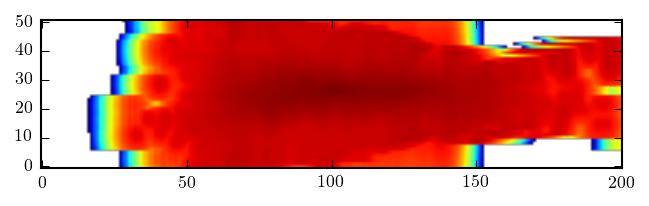

In [23]:
plt.imshow(np.log(np.sum(d, axis=1)), origin='lower')

/home/carlson/ipython/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in divide
/home/carlson/ipython/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide
/home/carlson/ipython/IPython/kernel/__main__.py:33: RuntimeWarning: invalid value encountered in less


In [ ]:
from mayavi import mlab
mlab.contour3d(reversed_arr)
mlab.show()

SIMPLE  =                    T / Written by IDL:  Thu Jul 26 11:22:13 2012      
BITPIX  =                    -32 / Number of bits per data pixel                
NAXIS   =                      3 / Number of data axes                          
NAXIS1  =                    401 /                                              
NAXIS2  =                    401 /                                              
NAXIS3  =                    121 /                                              
CTYPE1  = 'x       '           / axis type                                      
CRVAL1  =             -2.000E+01 / x                                            
CDELT1  =              1.000E-01 / x increment                                  
CUNIT1  = 'kpc     '           / unit type                                      
CTYPE2  = 'y       '           / axis type                                      
CRVAL2  =            -2.000E+01  / y                                            
CDELT2  =             1.000E

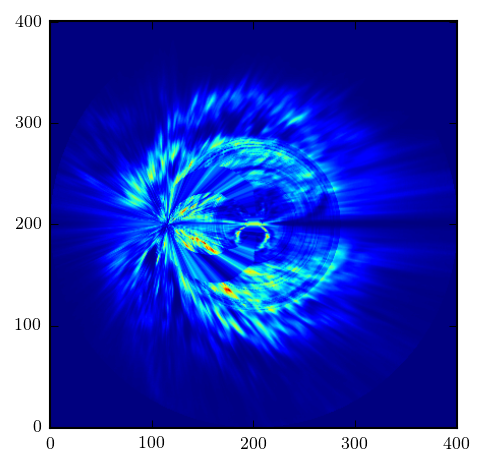

In [19]:
hdu = pyfits.open('tavakoli_hi/HI_number_density_xyz.fits')
for i in hdu[0].header.cards:
    print i
    
plt.imshow(hdu[0].data[61], origin='lower')